In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import math

In [2]:
TempLJ = pd.read_csv("../Podatki/Temp_LJ.csv")

In [3]:
TempLJ.rename(columns={"LETO": "Leto", "MESEC": "Mesec", "TEMPERATURA": "Temperatura"}, inplace=True)

In [4]:
n = len(TempLJ)
Zapored = []

for i in range(n):
    Zapored.append(i)

Ena = []
for i in range(n):
    Ena.append(1)


In [5]:
TempLJ["ZaporedniMesec"] = Zapored
TempLJ["Ena"] = Ena

In [6]:
TempLJ

,Leto,Mesec,Temperatura,ZaporedniMesec,Ena
0,1986,1,0.1,0,1
1,1986,2,-2.8,1,1
2,1986,3,3.2,2,1
3,1986,4,10.2,3,1
4,1986,5,17.6,4,1
...,...,...,...,...,...
415,2020,8,22.2,415,1
416,2020,9,17.5,416,1
417,2020,10,11.9,417,1
418,2020,11,5.3,418,1


A del naloge - enostavna linarna regresija za spreminjanje temperature

In [7]:
X = TempLJ["ZaporedniMesec"].to_numpy().reshape([n, 1])
Y = TempLJ["Temperatura"].to_numpy().reshape([n, 1])
Z = TempLJ["Ena"].to_numpy().reshape([n, 1])

In [8]:
A = np.concatenate((Z, X), axis=1)

In [9]:
B = np.dot(np.dot(np.linalg.inv(np.dot(A.T, A)), A.T), Y)

In [10]:
B

array([[1.00642167e+01],
       [5.69188520e-03]])

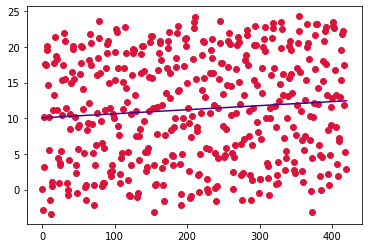

In [11]:
for i in range(n):
    plt.plot(TempLJ["ZaporedniMesec"][i], TempLJ["Temperatura"][i], "crimson", marker="o")
x = np.linspace(0, 420, 840)
plt.plot(x, B[1]*x + B[0], color="indigo")

In [12]:
y0 = B[1]*0 + B[0]
y419 = B[1]*419 + B[0]

prvi = y0.item()
zadnji = y419.item()

In [13]:
prvi, zadnji

(10.06421671756587, 12.449116615767437)